# Graduation Project using CNN Archietecture


---




## Connect Colab to Drive to access the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os 
np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set_style('darkgrid')

# DataSet

## 2.0 Open Folders

In [ ]:
Insect_Allergy = '/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/Insect Allergy'
Bacterial_infection = '/content/drive/MyDrive/Graduation Project DataSet/أمراض الجلدية/Bacterial infection'

## 2.1 Change Files Names

In [ ]:
# 01- Store images files in list  --> Now You can indexing or Slicing images_files

Allergy_images = os.listdir(Insect_Allergy)
Bacteria_images = os.listdir(Bacterial_infection)

In [ ]:
# 02- Change Files names

# Allergy
for i in range(len(os.listdir(Insect_Allergy))):
  os.rename(os.path.join(Insect_Allergy, os.listdir(Insect_Allergy)[i]), os.path.join(Insect_Allergy, 'Allergy_'+str(i+1)))
  print(os.listdir(Insect_Allergy)[i])



# Bacteria
for i in range(len(os.listdir(Bacterial_infection))):
  os.rename(os.path.join(Bacterial_infection, os.listdir(Bacterial_infection)[i]), os.path.join(Bacterial_infection, 'Bacteria_'+str(i+1)))
  print(os.listdir(Bacterial_infection)[i])

In [ ]:
# 03- Print Some Results

print(Allergy_images[90:])
print(Bacteria_images[90:])

In [ ]:
# # 02- Change Files names

# # Allergy
# for i in range(len(Allergy_images)):
#   Allergy_images[i] = Allergy_images[i].replace(Allergy_images[i].split('.')[0], 'Allergy_'+str(i+1))
#   # print(Bacteria_images[i])


# # Bacteria
# for i in range(len(Bacteria_images)):
#   Bacteria_images[i] = Bacteria_images[i].replace(Bacteria_images[i].split('.')[0], 'Bacteria_'+str(i+1))
#   # print(Bacteria_images[i])

## 2.2 Check Images Size

### Insect Allergy

In [ ]:
# image_size = []

# for img in os.listdir(Insect_Allergy):
#         img = plt.imread(os.path.join(Insect_Allergy, img))
#         image_size.append(img.shape)
        
# pd.Series(image_size).value_counts()  

(1440, 3200, 3)    37
(4000, 3000, 3)    37
(1280, 960, 3)     19
(1280, 958, 3)     18
(4608, 3456, 3)    14
(3000, 4000, 3)    10
(4624, 3468, 3)     8
(3468, 4624, 3)     8
(3456, 4608, 3)     7
(1280, 1280, 3)     6
(2448, 3264, 3)     5
(3200, 1440, 3)     5
(155, 326, 3)       5
(3264, 2448, 3)     3
(194, 259, 3)       3
(183, 275, 3)       2
(259, 194, 3)       2
(165, 305, 3)       1
(170, 297, 3)       1
(1218, 1697, 3)     1
(186, 272, 3)       1
(1755, 831, 3)      1
(183, 276, 3)       1
(188, 268, 3)       1
(141, 300, 3)       1
(138, 364, 3)       1
(159, 318, 3)       1
(225, 225, 3)       1
(250, 201, 3)       1
(1113, 852, 3)      1
dtype: int64

### Bacterial Infection



In [ ]:
image_size = []

for img in os.listdir(Bacterial_infection):
        img = plt.imread(os.path.join(Bacterial_infection, img))
        image_size.append(img.shape)
        
pd.Series(image_size).value_counts()

(1440, 3200, 3)    30
(1280, 1280, 3)     7
(1280, 960, 3)      7
(3456, 4608, 3)     6
(1280, 958, 3)      6
(2448, 3264, 3)     5
(3200, 1440, 3)     4
(4608, 3456, 3)     3
(4000, 3000, 3)     3
(183, 275, 3)       3
(4624, 3468, 3)     3
(194, 260, 3)       2
(165, 305, 3)       2
(186, 271, 3)       2
(195, 258, 3)       1
(217, 232, 3)       1
(220, 229, 3)       1
(162, 311, 3)       1
(247, 204, 3)       1
(184, 275, 3)       1
(184, 274, 3)       1
(164, 306, 3)       1
(201, 251, 3)       1
(186, 272, 3)       1
(168, 300, 3)       1
(238, 212, 3)       1
(174, 290, 3)       1
(340, 340, 3)       1
(1370, 2661, 3)     1
(3468, 4624, 3)     1
(2238, 1461, 3)     1
(1902, 1963, 3)     1
(3000, 4000, 3)     1
(4095, 1216, 3)     1
(4095, 1281, 3)     1
(192, 262, 3)       1
dtype: int64

## 2.3 Label each Class

In [ ]:
folders = {
    # 'key', 'value'
    Bacterial_infection : 0,
    Insect_Allergy: 1,
}

for key, value in folders.items():
    print(f'The Label of Class {key.split()[-1]} is: {value}')

The Label of Class infection is: 0
The Label of Class Allergy is: 1


## 2.4 Reading Images



In [ ]:
import cv2
import random


folders_paths = [Bacterial_infection, Insect_Allergy]
SIZE = 150  # What about Changing it !!

Data = []
Label = []

for folder in folders_paths:
    x = 0
    for image in os.listdir(folder):
        x +=1
        image = cv2.imread(os.path.join(folder, image))
        image_array = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), (SIZE, SIZE))  # BGR2RGB
        Data.append(image_array)
        Label.append(folders[folder])
        
        if x == 150:
            break

## 2.4 Check Number of images

In [ ]:
print(f'The total Number of images is: {len(Data)} image')
print(f'The total Number of labels is: {len(Label)} Label')
print(Data[0].shape)

The total Number of images is: 300 image
The total Number of labels is: 300 Label
(150, 150, 3)


## 2.5 Sample of Data

In [ ]:
print(Data[0][0][0][0])  
print(Label[0])
print(f'Type of Reading Images is {type(Data)}')

139
0
Type of Reading Images is <class 'list'>


## 2.6 Visualize some images

In [ ]:
folders_name = {
        # 'Key' : value 
        'Bacterial_infection': 0,
        'Insect_Allergy': 1  
    }

def get_folder_name(x):
    # function to return class name
    for key, value in folders_name.items():
        if x == value:
            return key


# plt.figure(figsize=(24,24))
# for n , i in enumerate(list(np.random.randint(0,len(Data),36))) : 
#     plt.subplot(6,6,n+1)
#     plt.imshow(Data[i])   
#     plt.axis('off')
#     plt.title(get_folder_name(Label[i]))

## 2.7 Convert Data to Array

In [ ]:
Data = np.array(Data)
Label = np.array(Label)

print(f'Data shape is {Data.shape}')
print(f'Label shape  is {Label.shape}')

Data shape is (300, 150, 150, 3)
Label shape  is (300,)


## 2.8 Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=0.3, random_state=2, shuffle=True)

In [ ]:
print(f'X_train shape is {X_train.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_test shape is {y_test.shape}')

X_train shape is (210, 150, 150, 3)
X_test shape is (90, 150, 150, 3)
y_train shape is (210,)
y_test shape is (90,)


## 2.9 Normalization

In [ ]:
# Normalization
X_train_Norm = X_train / 255.0
X_test_Norm = X_test / 255.0

In [ ]:
X_train[0]

In [ ]:
X_train_Norm[0]

# Building CNN Model

## 3.1 Intialize the CNN Network

In [ ]:
#First Architecture

# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(SIZE,SIZE,3), padding='same'))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

          
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
          
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))   # keep mind !!! about  

In [ ]:
# # Second Architecture
# import keras
# model = keras.models.Sequential([
#         keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(SIZE,SIZE,3)),
#         keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
#         keras.layers.MaxPool2D(4,4),
#         keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
#         keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
#         keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
#         keras.layers.MaxPool2D(4,4),
#         keras.layers.Flatten() ,    
#         keras.layers.Dense(120,activation='relu') ,    
#         keras.layers.Dense(100,activation='relu') ,    
#         keras.layers.Dense(50,activation='relu') ,        
#         keras.layers.Dropout(rate=0.5) ,            
#         keras.layers.Dense(2,activation='softmax') ,    
#         ])

## 3.2 Compile Neural Network

In [ ]:
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      25632     
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)       

## 3.3 Training the Model 

In [ ]:
epochs = 20
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    batch_size=16)

Epoch 1/20
9/9 [==============================] - 4s 131ms/step - loss: 5.5136 - accuracy: 0.5357 - val_loss: 45.3276 - val_accuracy: 0.5167
Epoch 2/20
9/9 [==============================] - 0s 42ms/step - loss: 2.8123 - accuracy: 0.6571 - val_loss: 21.8238 - val_accuracy: 0.5167
Epoch 3/20
9/9 [==============================] - 0s 41ms/step - loss: 1.1657 - accuracy: 0.6429 - val_loss: 6.7651 - val_accuracy: 0.5167
Epoch 4/20
9/9 [==============================] - 0s 46ms/step - loss: 0.7929 - accuracy: 0.7214 - val_loss: 2.0551 - val_accuracy: 0.4833
Epoch 5/20
9/9 [==============================] - 1s 96ms/step - loss: 0.5205 - accuracy: 0.8643 - val_loss: 1.8701 - val_accuracy: 0.4667
Epoch 6/20
9/9 [==============================] - 1s 79ms/step - loss: 0.2548 - accuracy: 0.8929 - val_loss: 1.7128 - val_accuracy: 0.5167
Epoch 7/20
9/9 [==============================] - 0s 46ms/step - loss: 0.1171 - accuracy: 0.9571 - val_loss: 1.9368 - val_accuracy: 0.5167
Epoch 8/20
9/9 [========

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 1s 12ms/step - loss: 5.0417 - accuracy: 0.7347


[5.041662693023682, 0.7346938848495483]

## 3.4 Model Evaluation

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Loss is {}'.format(loss))
print('Test Accuracy is {}'.format(acc))

2/2 [==============================] - 0s 19ms/step - loss: 43.1261 - accuracy: 0.5200
Test Loss is 43.12608337402344
Test Accuracy is 0.5199999809265137


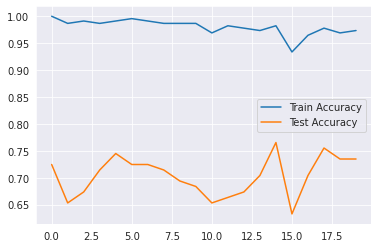

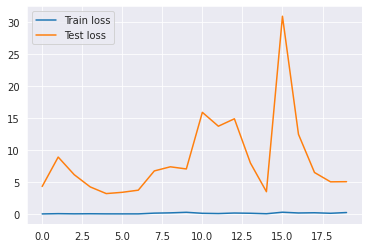

In [ ]:
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

## 3.5 Prediction

In [ ]:
# predict results
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 14ms/step


In [ ]:
# Some checks 
y_predict = []
for i in range(10):
    y_predict.append(np.argmax(y_pred[i]))
    
y_predict = np.array(y_predict)
print(y_predict)
print(y_test[0:10])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 1 1 0 0]


In [ ]:
plt.figure(figsize=(24,24))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(get_folder_name(np.argmax(y_pred[i])))

Output hidden; open in https://colab.research.google.com to view.

## 3.6 Saving Model

In [ ]:
# model.save('/content/Basic_CNN.h5')

# Binary Classification test

## test_1

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size = (2,2)))
# model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
# model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (5,5), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 64)      4864      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 58, 58, 32)        51232     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 16)       

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20,batch_size=16,verbose=1)

Epoch 1/20
15/15 [==============================] - 3s 39ms/step - loss: 70.3160 - accuracy: 0.5354 - val_loss: 0.7398 - val_accuracy: 0.4388
Epoch 2/20
15/15 [==============================] - 0s 20ms/step - loss: 1.0556 - accuracy: 0.5752 - val_loss: 0.6901 - val_accuracy: 0.5816
Epoch 3/20
15/15 [==============================] - 0s 17ms/step - loss: 0.8959 - accuracy: 0.6018 - val_loss: 0.7010 - val_accuracy: 0.5102
Epoch 4/20
15/15 [==============================] - 0s 17ms/step - loss: 0.9154 - accuracy: 0.6504 - val_loss: 0.7165 - val_accuracy: 0.4694
Epoch 5/20
15/15 [==============================] - 0s 20ms/step - loss: 0.7447 - accuracy: 0.5265 - val_loss: 0.6933 - val_accuracy: 0.6122
Epoch 6/20
15/15 [==============================] - 0s 21ms/step - loss: 0.8927 - accuracy: 0.6062 - val_loss: 0.6898 - val_accuracy: 0.6327
Epoch 7/20
15/15 [==============================] - 0s 19ms/step - loss: 0.6931 - accuracy: 0.5708 - val_loss: 0.7431 - val_accuracy: 0.5102
Epoch 8/20
1

## test_2

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(optimizer = 'adam', loss= "binary_crossentropy", metrics=["acc"])


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20,batch_size=16,verbose=1)

Epoch 1/20
15/15 [==============================] - 0s 17ms/step - loss: 0.0126 - acc: 0.9956 - val_loss: 4.8671 - val_acc: 0.6633
Epoch 2/20
15/15 [==============================] - 0s 12ms/step - loss: 0.0906 - acc: 0.9823 - val_loss: 1.6410 - val_acc: 0.6429
Epoch 3/20
15/15 [==============================] - 0s 12ms/step - loss: 0.0313 - acc: 0.9823 - val_loss: 2.3374 - val_acc: 0.6735
Epoch 4/20
15/15 [==============================] - 0s 11ms/step - loss: 0.2869 - acc: 0.9513 - val_loss: 3.8761 - val_acc: 0.6327
Epoch 5/20
15/15 [==============================] - 0s 12ms/step - loss: 0.1270 - acc: 0.9513 - val_loss: 2.9782 - val_acc: 0.7245
Epoch 6/20
15/15 [==============================] - 0s 11ms/step - loss: 0.0812 - acc: 0.9646 - val_loss: 2.6540 - val_acc: 0.6224
Epoch 7/20
15/15 [==============================] - 0s 11ms/step - loss: 1.4633 - acc: 0.8982 - val_loss: 2.3930 - val_acc: 0.6531
Epoch 8/20
15/15 [==============================] - 0s 12ms/step - loss: 0.1327 - a

# Dr.Ahmed Elsallab Architecture

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          batch_size=32,
          epochs= 50)

Epoch 1/50
7/7 [==============================] - 0s 57ms/step - loss: 2.1208e-07 - acc: 1.0000 - val_loss: 4.2158 - val_acc: 0.6444
Epoch 2/50
7/7 [==============================] - 0s 47ms/step - loss: 1.7419e-07 - acc: 1.0000 - val_loss: 4.2017 - val_acc: 0.6778
Epoch 3/50
7/7 [==============================] - 0s 71ms/step - loss: 1.3981e-07 - acc: 1.0000 - val_loss: 4.2306 - val_acc: 0.6778
Epoch 4/50
7/7 [==============================] - 0s 45ms/step - loss: 9.7447e-08 - acc: 1.0000 - val_loss: 4.3121 - val_acc: 0.6889
Epoch 5/50
7/7 [==============================] - 0s 38ms/step - loss: 6.8344e-08 - acc: 1.0000 - val_loss: 4.3674 - val_acc: 0.6889
Epoch 6/50
7/7 [==============================] - 0s 40ms/step - loss: 4.6542e-08 - acc: 1.0000 - val_loss: 4.3800 - val_acc: 0.7000
Epoch 7/50
7/7 [==============================] - 0s 35ms/step - loss: 3.7802e-08 - acc: 1.0000 - val_loss: 4.4278 - val_acc: 0.6889
Epoch 8/50
7/7 [==============================] - 0s 29ms/step - loss

In [ ]:
# Some checks 
y_pred = model.predict(X_test)
y_predict = []
for i in range(10):
    y_predict.append(np.argmax(y_pred[i]))
    
y_predict = np.array(y_predict)
print(y_predict)
print(y_test[0:10])

3/3 [==============================] - 0s 9ms/step
[0 0 0 0 0 0 0 0 0 0]
[0 1 1 1 0 1 0 0 1 0]


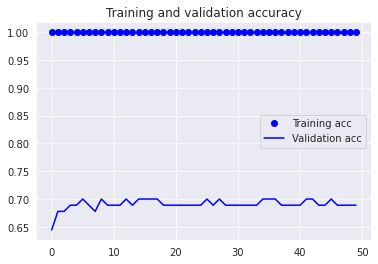

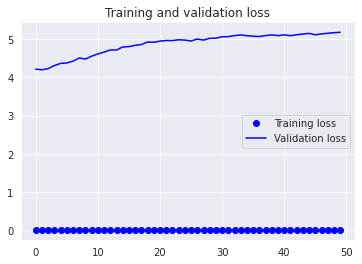

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(24,24))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    plt.title(get_folder_name(np.argmax(y_pred[i])))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in range(len(y_test)):
  print('The actual label is {}'.format(y_test[i]), '\t', 'and the predict is {}'.format(np.argmax(y_pred[i])))

The actual label is 0 	 and the predict is 0
The actual label is 1 	 and the predict is 0
The actual label is 1 	 and the predict is 0
The actual label is 1 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual label is 1 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual label is 1 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual label is 1 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual label is 1 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual label is 0 	 and the predict is 0
The actual